<a href="https://colab.research.google.com/github/ghadear1985/ProgrammingAssignment2/blob/master/using_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaning data in Python is a crucial step in the data preprocessing pipeline. It involves handling missing values, removing duplicates, and transforming data into a format suitable for analysis. Categorical variables, on the other hand, represent qualitative data and need special treatment in many machine learning algorithms.

Here's a basic guide on how to clean data and handle categorical variables in Python:

Cleaning Data:


Handling Missing Values:

Use the isnull() method to identify missing values.
Decide on a strategy for handling missing data, such as imputation or removal.
Use functions like fillna() to fill missing values or dropna() to remove rows with missing values.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DATAMASTER.csv')

In [3]:
df.head()

,Pressure,IC,Shear_Rate,Shear_Stress,Viscosity
0,0,0,0.10,0.014740,0.147420
1,0,0,1.36,0.020772,0.015226
2,0,0,2.63,0.022153,0.008428
3,0,0,3.89,0.015897,0.004083
4,0,0,5.16,0.022327,0.004329


In [4]:
df.fillna(df.mean(), inplace=True)

Handling Categorical Variables:


Identifying Categorical Variables:

Use dtypes attribute to identify the data types of columns.
Check for object-type columns, as they often indicate categorical variables.


In [6]:
print(df.dtypes)

Pressure          int64
IC                int64
Shear_Rate      float64
Shear_Stress    float64
Viscosity       float64
dtype: object


Encoding Categorical Variables:

Convert categorical variables into a numerical format using techniques like one-hot encoding or label encoding.

In [7]:
df_encoded = pd.get_dummies(df, columns=['Pressure','IC'])


In [8]:
df_encoded.head()

,Shear_Rate,Shear_Stress,Viscosity,Pressure_0,Pressure_50,Pressure_100,IC_0,IC_50,IC_100,IC_150,IC_200
0,0.10,0.014740,0.147420,1,0,0,1,0,0,0,0
1,1.36,0.020772,0.015226,1,0,0,1,0,0,0,0
2,2.63,0.022153,0.008428,1,0,0,1,0,0,0,0
3,3.89,0.015897,0.004083,1,0,0,1,0,0,0,0
4,5.16,0.022327,0.004329,1,0,0,1,0,0,0,0


To analyze the effect of independent variables ("Shear_Rate," "Pressure_0," "Pressure_50," "Pressure_100," "IC_0," "IC_50," "IC_100," "IC_150," "IC_200") on dependent variables ("Shear_Stress" and "Viscosity") using AdaBoost with a random forest as the base estimator, you can follow these steps:

Load necessary libraries:

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Load and Prepare Data:
Load your dataset and handle categorical variables using one-hot encoding (dummy variables).

In [11]:
df_encoded.head()

,Shear_Rate,Shear_Stress,Viscosity,Pressure_0,Pressure_50,Pressure_100,IC_0,IC_50,IC_100,IC_150,IC_200
0,0.10,0.014740,0.147420,1,0,0,1,0,0,0,0
1,1.36,0.020772,0.015226,1,0,0,1,0,0,0,0
2,2.63,0.022153,0.008428,1,0,0,1,0,0,0,0
3,3.89,0.015897,0.004083,1,0,0,1,0,0,0,0
4,5.16,0.022327,0.004329,1,0,0,1,0,0,0,0


Define Features and Target:

In [15]:
features = ['Shear_Rate','Pressure_0','Pressure_50','Pressure_100','IC_0','IC_50','IC_100','IC_150','IC_200']
target_shear_stress = 'Shear_Stress'
target_viscosity = 'Viscosity'

In [16]:
X = df_encoded[features]
y_shear_stress = df_encoded[target_shear_stress]
y_viscosity = df_encoded[target_viscosity]

Split Data into Training and Testing Sets:

In [17]:
X_train, X_test, y_shear_stress_train, y_shear_stress_test, y_viscosity_train, y_viscosity_test = train_test_split(X, y_shear_stress, y_viscosity, test_size=0.2, random_state=42)

Initialize and Train AdaBoost with Random Forest:


In [22]:
# AdaBoost for Shear Stress
base_rf_shear_stress = RandomForestRegressor(n_estimators=10, random_state=42)
ada_shear_stress = AdaBoostRegressor(base_rf_shear_stress, n_estimators=10, random_state=42)
ada_shear_stress.fit(X_train, y_shear_stress_train)

# AdaBoost for Viscosity
base_rf_viscosity = RandomForestRegressor(n_estimators=10, random_state=42)
ada_viscosity = AdaBoostRegressor(base_rf_viscosity, n_estimators=10, random_state=42)
ada_viscosity.fit(X_train, y_viscosity_train)


AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=10,
                                                  random_state=42),
                  n_estimators=10, random_state=42)

Evaluate the Models:


In [23]:
# Predictions
y_shear_stress_pred = ada_shear_stress.predict(X_test)
y_viscosity_pred = ada_viscosity.predict(X_test)

# Evaluate Shear Stress Model
mse_shear_stress = mean_squared_error(y_shear_stress_test, y_shear_stress_pred)
print(f'Mean Squared Error for Shear Stress: {mse_shear_stress}')

# Evaluate Viscosity Model
mse_viscosity = mean_squared_error(y_viscosity_test, y_viscosity_pred)
print(f'Mean Squared Error for Viscosity: {mse_viscosity}')

Mean Squared Error for Shear Stress: 0.003138936964554995
Mean Squared Error for Viscosity: 0.4597002472302768


The R2 score ranges from 0 to 1, where 1 indicates a perfect fit. Keep in mind that R2 should be interpreted carefully, as it can be sensitive to overfitting, and a high R2 doesn't necessarily mean a good model. It's always a good idea to complement R2 with other metrics and validate your model's performance thoroughly. Adjust the hyperparameters and features to optimize your model's performance.

In [24]:
from sklearn.metrics import r2_score

# Evaluate Shear Stress Model
mse_shear_stress = mean_squared_error(y_shear_stress_test, y_shear_stress_pred)
r2_shear_stress = r2_score(y_shear_stress_test, y_shear_stress_pred)
print(f'Mean Squared Error for Shear Stress: {mse_shear_stress}')
print(f'R-squared for Shear Stress: {r2_shear_stress}')

# Evaluate Viscosity Model
mse_viscosity = mean_squared_error(y_viscosity_test, y_viscosity_pred)
r2_viscosity = r2_score(y_viscosity_test, y_viscosity_pred)
print(f'Mean Squared Error for Viscosity: {mse_viscosity}')
print(f'R-squared for Viscosity: {r2_viscosity}')

Mean Squared Error for Shear Stress: 0.003138936964554995
R-squared for Shear Stress: 0.9983218925762409
Mean Squared Error for Viscosity: 0.4597002472302768
R-squared for Viscosity: 0.24184807793739183


Certainly! Visualizing your model's performance is crucial for understanding its strengths and weaknesses. Here are some suggested graphs for analyzing the performance of your regression models:

Actual vs. Predicted Scatter Plot:

Create scatter plots to compare the actual values against the predicted values for both Shear Stress and Viscosity.

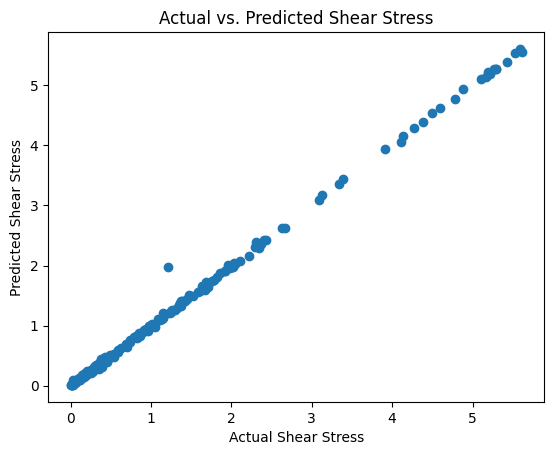

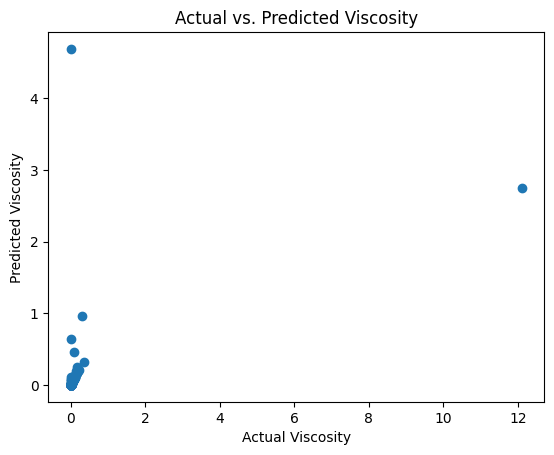

In [25]:
import matplotlib.pyplot as plt

# Actual vs. Predicted for Shear Stress
plt.scatter(y_shear_stress_test, y_shear_stress_pred)
plt.xlabel("Actual Shear Stress")
plt.ylabel("Predicted Shear Stress")
plt.title("Actual vs. Predicted Shear Stress")
plt.show()

# Actual vs. Predicted for Viscosity
plt.scatter(y_viscosity_test, y_viscosity_pred)
plt.xlabel("Actual Viscosity")
plt.ylabel("Predicted Viscosity")
plt.title("Actual vs. Predicted Viscosity")
plt.show()


Residuals Plot:

Visualize the residuals (the differences between actual and predicted values) to check for patterns or heteroscedasticity.

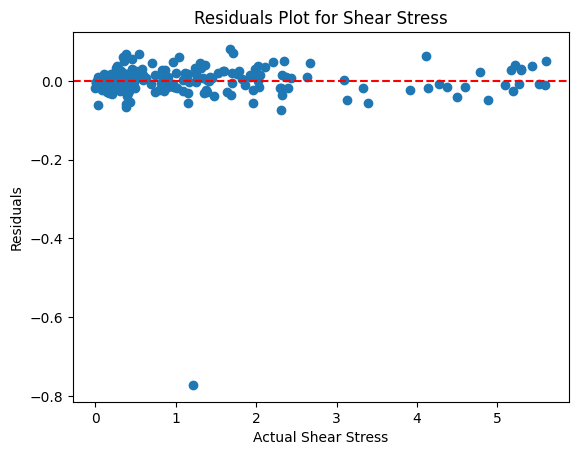

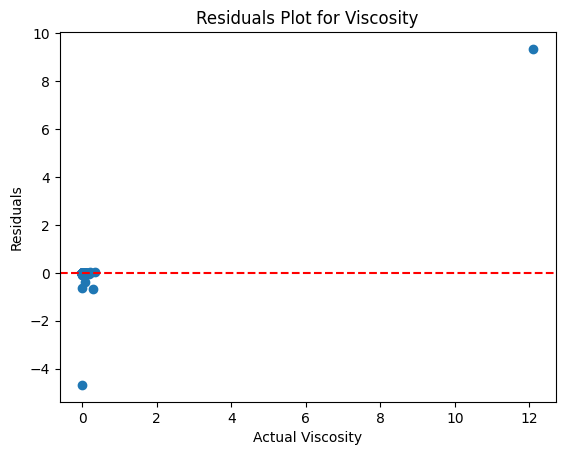

In [26]:
# Residuals for Shear Stress
shear_stress_residuals = y_shear_stress_test - y_shear_stress_pred
plt.scatter(y_shear_stress_test, shear_stress_residuals)
plt.xlabel("Actual Shear Stress")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Shear Stress")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Residuals for Viscosity
viscosity_residuals = y_viscosity_test - y_viscosity_pred
plt.scatter(y_viscosity_test, viscosity_residuals)
plt.xlabel("Actual Viscosity")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Viscosity")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Feature Importance Plot:

If you're interested in the importance of different features, you can visualize the feature importance scores from the RandomForestRegressor.

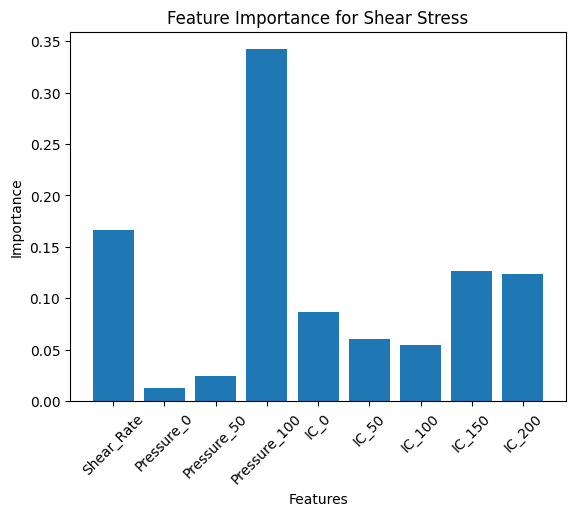

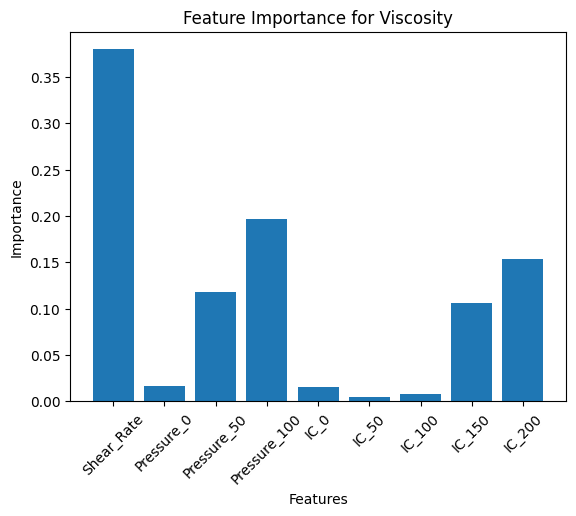

In [27]:
# Feature Importance for Shear Stress
feature_importance_shear_stress = ada_shear_stress.feature_importances_
plt.bar(features, feature_importance_shear_stress)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance for Shear Stress")
plt.xticks(rotation=45)
plt.show()

# Feature Importance for Viscosity
feature_importance_viscosity = ada_viscosity.feature_importances_
plt.bar(features, feature_importance_viscosity)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance for Viscosity")
plt.xticks(rotation=45)
plt.show()


Certainly! To calculate and visualize the correlation between independent features and dependent features, you can use the correlation matrix. Here's an example using the Pandas library and Seaborn for visualization:


In this heatmap:

Values close to 1 indicate a strong positive correlation.
Values close to -1 indicate a strong negative correlation.
Values close to 0 indicate a weak correlation.
This visualization allows you to quickly identify relationships between different features and targets. Keep in mind that correlation does not imply causation, so it's essential to interpret the results in the context of your specific problem and domain knowledge.

Note: Ensure that the features and targets used in this example match the actual column names in your DataFrame. Adjust them accordingly if needed.

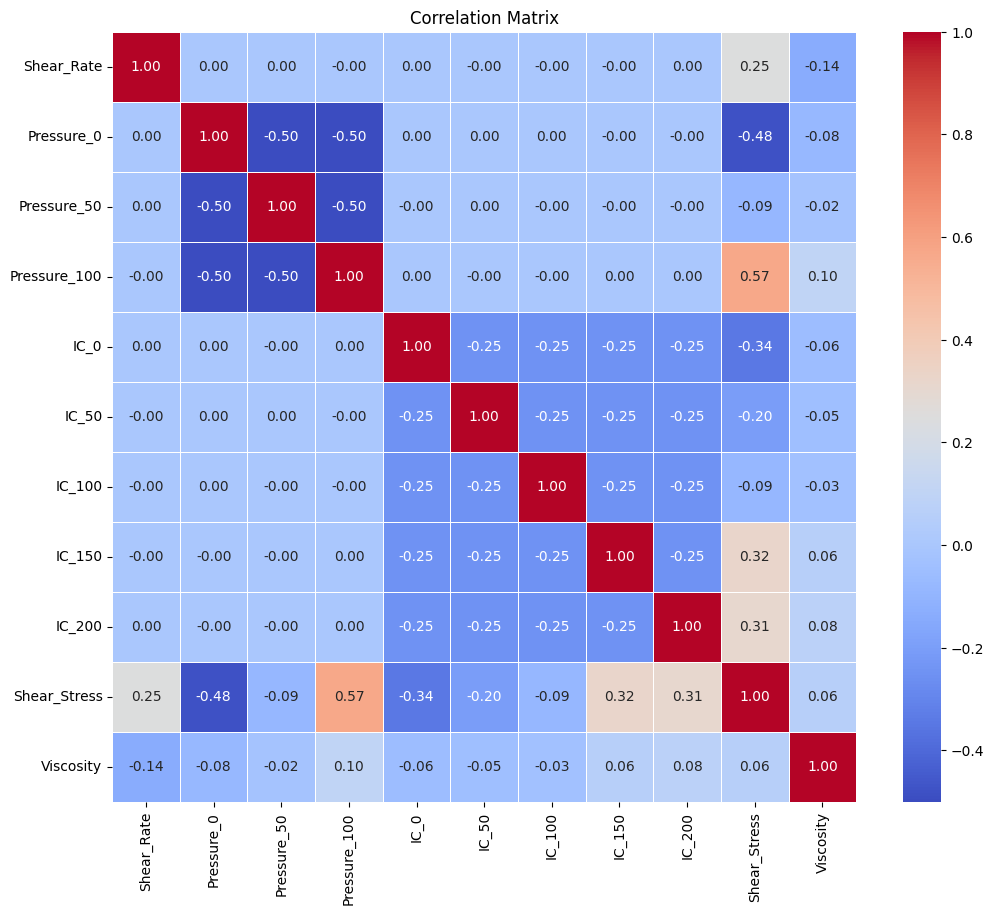

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with encoded features
# features include 'Shear_Rate', 'Pressure_0_0', 'Pressure_0_1', ..., 'IC_200_1'
# targets include 'Shear_Stress' and 'Viscosity'

# Combine features and targets into a single DataFrame
df_combined = pd.concat([df_encoded[features], df_encoded[['Shear_Stress', 'Viscosity']]], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
